# Artificial Neural Network (ANN)

Perceptron model - 3 Inputs and 1 output. Some mathematical operation in the 'Out' node.

Feature space - a geometric representation of the data, where each feature is an axis and each observation is a coordinate.

Separating hyperplane - a boundary that binarizes and categorizes data. It is used as a "decision boundary".


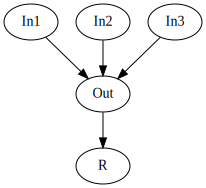

In [12]:
import graphviz
dot = graphviz.Digraph()
dot.node('In1')
dot.node('In2')
dot.node('In3')
dot.node('Out')
dot.node('R')
dot.edge('In1', 'Out')
dot.edge('In2', 'Out')
dot.edge('In3', 'Out')
dot.edge('Out', 'R')
dot

An averaging machine. 
Output is $8\cdot \frac{1}{3} + 5 \cdot \frac{1}{3} - 4 \cdot \frac{1}{3} = 3$ . If you change the weights
you will get different result for same inputs. This is a dot product of two vectors.
$ y = x^Tw$ . This is linear operation.

Linear models only solve linearly separable problems.

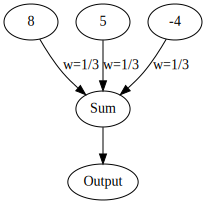

In [18]:
dot = graphviz.Digraph()
dot.node('8')
dot.node('5')
dot.node('-4')
dot.node('Sum')
dot.node('Output')
dot.edge('8','Sum', label='w=1/3')
dot.edge('5','Sum', label='w=1/3')
dot.edge('-4', 'Sum', label='w=1/3')
dot.edge('Sum', 'Output')
dot

Add one more node - signum function - 1 for positive -1 for negative. Can be written as $ \hat{y} = \sigma (x^Tw)$ . This nonlinear 
function is called sigma. This will be a **activation** function. Activation function is nonlinear.

Bias (intercept) - allows the line to go off origin. The line can be: $y=mx$ with bias term $y=mx+b$

Now get $\sigma (x^Tw + bw_0) = \hat{y}$ , usually set b = 1 because $bw_0$ is just multiplication of two numbers.

$$\sigma (x^Tw + w_0) = \hat{y} $$

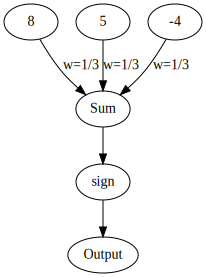

In [19]:
dot = graphviz.Digraph()
dot.node('8')
dot.node('5')
dot.node('-4')
dot.node('Sum')
dot.node('Output')
dot.node('sign')
dot.edge('8','Sum', label='w=1/3')
dot.edge('5','Sum', label='w=1/3')
dot.edge('-4', 'Sum', label='w=1/3')
dot.edge('Sum', 'sign')
dot.edge('sign', 'Output')

dot

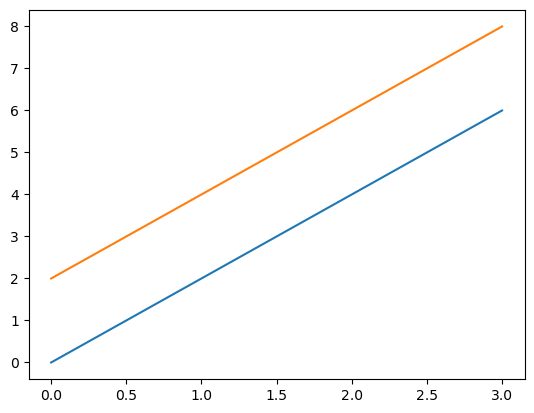

In [25]:
import numpy as np
import matplotlib.pyplot as plt

bias = 2
x = np.linspace(0, 3, 100)
plt.plot(x, 2*x)
plt.plot(x, 2*x+bias)

## Forward propagation

$\sigma$ is nonlinear activation function. Bias can be absorbed into the dot product.

$$ \hat{y} = \sigma (x_0w_0 + \Sigma_{i=1}^{m} x_i w_i ) = \sigma (w_0 + x^Tw) = \sigma (x^Tw)$$

Different set of weights will get different hyperplanes.

## Error, loss, cost

Binarized errors vs. continuos error. 

Continuos errors - used to learn the model.

Binarized errors - evaluating the model.

### Loss functions
**Mean squared error** (MSE) $ L = \frac{1}{2} (\hat{y} - y)^2$

Used for continuos data when the output is numerical prediction.

**Cross-entropy** (logistics)

Used for categorical data when the output is probability.

$$ L = -(y log(\hat{y}) + (1-y) log(1-\hat{y}))$$

### Cost function
From loss to cost. Average of loss.

$$ J = \frac{1}{n} \Sigma L(\hat{y_i}, y_i)$$

Goal: Find the set of weights that minimizes the losses. $ W = arg_w min J$

## Backpropagation
$ \sigma(x^Tw) = \hat{y}$ we can update only $w$. We calculate $w \longleftarrow w - \eta \partial L$ where $\eta$ is learning rate.
And derivative of loss function. This is gradient descent.

$\frac{\partial L(\hat{y},y)}{\partial w} = \frac{\partial L(\sigma(x^Tw),y)}{\partial w}$

MSE as an example: $ L(\hat{y},y) = \frac{1}{2} (\sigma(x^Tw) - y)^2$. These are embedded functions.

For simplicity set $u = \sigma (x^Tw) - y $

With chain rule we can write $\frac{\partial L(u)}{\partial w} = \frac{\partial L(u)}{\partial u} \frac{\partial u}{\partial w} $

## Regression
Simple regression means to predict one continuos variable from another
$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i$$

$\epsilo$ - error (residual)

In [7]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display


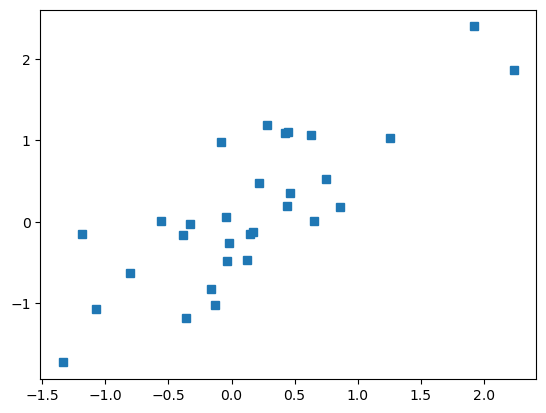

In [5]:
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,'s')

In [21]:
# build model

ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(), # activation function
    nn.Linear(1,1) # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [22]:
learningRate  = 0.05
lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [23]:
numepochs = 500
losses = torch.zeros(numepochs)

# train the model
for epochi in range(numepochs):
    yHat = ANNreg(x)
    # compute loss
    loss = lossfun(yHat, y)
    losses[epochi] = loss

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Text(0.5, 1.0, 'Final loss = 0.298468')

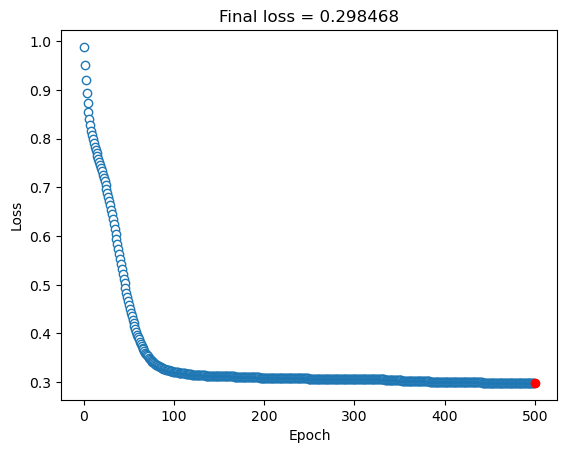

In [24]:
# Show the loss

predictions = ANNreg(x)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(numepochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())

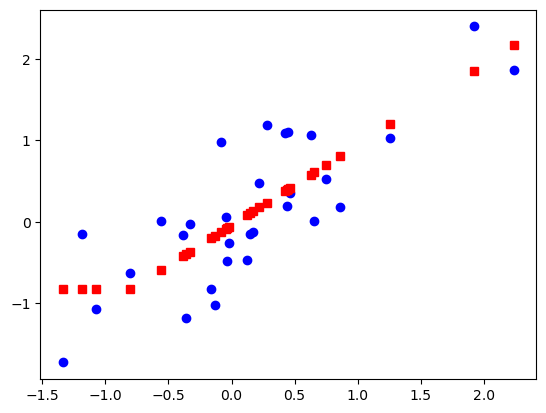

In [25]:
plt.plot(x,y, 'bo', label='Real data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
